### Load the data from the experiments

In [6]:
from s3ts.analysis import load_folder
from pathlib import Path

df = load_folder(Path("storage/synced"))
df.head()

0 duplicate entries removed
2239 total entries


,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,68.982387,30569.601099,30638.583486,NaN,NaN,10.0
1,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,83.244409,31746.921849,31830.166258,NaN,NaN,10.0
2,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,71.123601,35739.750665,35810.874266,NaN,NaN,10.0
3,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,100.135603,37059.353541,37159.489144,NaN,NaN,10.0
4,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,57.307215,17048.680783,17105.987998,NaN,NaN,10.0


In [7]:
df

,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,train_event_mult,nevents_test,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length
0,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,68.982387,30569.601099,30638.583486,NaN,NaN,10.0
1,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,83.244409,31746.921849,31830.166258,NaN,NaN,10.0
2,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,71.123601,35739.750665,35810.874266,NaN,NaN,10.0
3,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,100.135603,37059.353541,37159.489144,NaN,NaN,10.0
4,df,cnn,ArrowHead,False,10,False,1.0,1.0,32.0,False,...,4.0,200.0,384.0,384.0,57.307215,17048.680783,17105.987998,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,ts,rnn,Trace,False,50,False,1.0,1.0,32.0,False,...,4.0,200.0,256.0,256.0,61.227136,21177.777765,21239.004901,NaN,NaN,50.0
2235,ts,rnn,Trace,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,256.0,256.0,58.567771,25708.929500,25767.497272,NaN,NaN,70.0
2236,ts,rnn,Trace,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,256.0,256.0,45.624908,18162.921977,18208.546885,NaN,NaN,70.0
2237,ts,rnn,Trace,False,70,False,1.0,1.0,32.0,False,...,4.0,200.0,256.0,256.0,79.234320,17104.421421,17183.655741,NaN,NaN,70.0


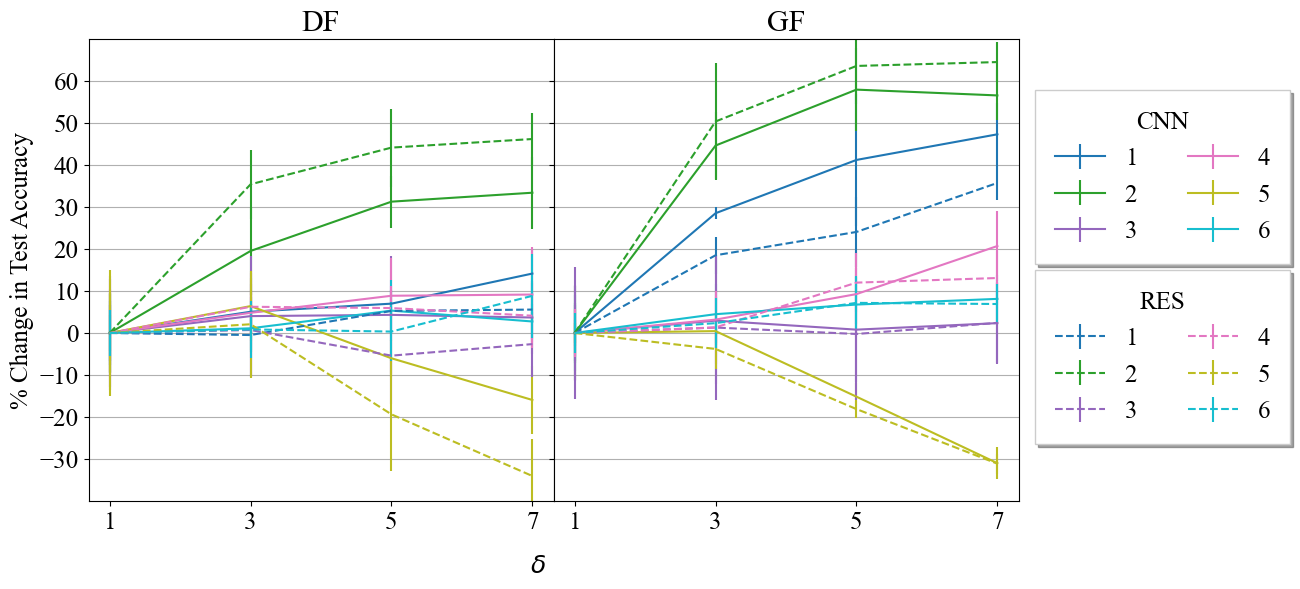

In [8]:
from s3ts.analysis import timedil_figure
timedil_figure(df)

In [135]:
data = df[df["pretrain_mode"] == False].copy()

data = data[data["window_time_stride"] == 7]
data = data[data["window_patt_stride"] == 1]

data = data[data["arch"].isin(["cnn", "res"])]

metric: str = "test_acc"

data[metric] = data[metric]*100

data["Method"] =  data["arch"] + "_" + data["mode"]
data.sort_values(["Method"], inplace=True)

data["arch"].replace(to_replace=["cnn", "res"], value=["CNN", "RES"], inplace=True)
data["mode"].replace(to_replace=["df", "gf"], value=["DF", "GF"], inplace=True)
data["Arch"] = data["arch"] + data["pretrained"].replace({True: "-", False: ""}) + data["stride_series"].replace({True: "B", False: "A"})
data["Arch"].replace({"CNNA": "CNN", "RESA": "RES"}, inplace=True)

data


,mode,arch,dataset,pretrain_mode,window_length,stride_series,window_time_stride,window_patt_stride,train_exc_limit,pretrained,...,nevents_train_lim,nevents_train_tot,time_dm,time_train,time_total,val_mse,val_r2,eq_wdw_length,Method,Arch
15,DF,CNN,ArrowHead,False,10,False,7.0,1.0,4.0,False,...,48.0,384.0,160.346038,1644.221873,1804.567911,NaN,NaN,70.0,cnn_df,CNN
329,DF,CNN,SyntheticControl,False,10,False,7.0,1.0,4.0,False,...,96.0,768.0,22.028865,329.628833,351.657698,NaN,NaN,70.0,cnn_df,CNN
328,DF,CNN,SyntheticControl,False,10,False,7.0,1.0,4.0,False,...,96.0,768.0,15.492610,612.783268,628.275878,NaN,NaN,70.0,cnn_df,CNN
327,DF,CNN,SyntheticControl,False,10,False,7.0,1.0,4.0,False,...,96.0,768.0,22.769853,378.902776,401.672629,NaN,NaN,70.0,cnn_df,CNN
326,DF,CNN,SyntheticControl,False,10,False,7.0,1.0,4.0,False,...,96.0,768.0,22.069354,474.682082,496.751436,NaN,NaN,70.0,cnn_df,CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,GF,RES,CBF,False,10,True,7.0,1.0,32.0,True,...,384.0,384.0,5.622227,33175.287363,33180.909590,NaN,NaN,70.0,res_gf,RES-B
1533,GF,RES,CBF,False,10,True,7.0,1.0,16.0,True,...,192.0,384.0,12.203776,38548.493270,38560.697047,NaN,NaN,70.0,res_gf,RES-B
1532,GF,RES,CBF,False,10,True,7.0,1.0,16.0,True,...,192.0,384.0,4.793107,7766.973265,7771.766372,NaN,NaN,70.0,res_gf,RES-B
1530,GF,RES,CBF,False,10,True,7.0,1.0,16.0,True,...,192.0,384.0,5.932882,10278.688450,10284.621333,NaN,NaN,70.0,res_gf,RES-B


In [136]:
import pandas as pd

dfs = []
for (mode, dataset, arch), gdf in data.groupby(["mode", "dataset", "arch"]):

    mean = gdf.groupby(["mode", "dataset", "Arch", "train_exc_limit"])[metric].mean().reset_index()
    std = gdf.groupby(["mode", "dataset", "Arch", "train_exc_limit"])[metric].std().reset_index()
    
    # baseline
    bline_mean, bline_std = mean[mean["Arch"] == arch][metric].values, std[std["Arch"] == arch][metric].values

    # a pretrain
    a_mean, a_std = mean[mean["Arch"] == f"{arch}-A"][metric].values, std[std["Arch"] == f"{arch}-A"][metric].values

    # b pretrain
    b_mean, b_std = mean[mean["Arch"] == f"{arch}-B"][metric].values, std[std["Arch"] == f"{arch}-B"][metric].values

    gdat = mean[mean["Arch"] == arch][["mode", "dataset", "train_exc_limit"]].copy()
    gdat["arch"] = arch
    gdat["bline_mean"], gdat["bline_std"] = bline_mean, bline_std 
    gdat["a_mean"], gdat["a_std"] = (a_mean - bline_mean)/bline_mean, a_std/a_mean
    gdat["b_mean"], gdat["b_std"] = (b_mean - bline_mean)/bline_mean, b_std/b_mean
    dfs.append(gdat)

pdata = pd.concat(dfs)
pdata


,mode,dataset,train_exc_limit,arch,bline_mean,bline_std,a_mean,a_std,b_mean,b_std
0,DF,ArrowHead,4.0,CNN,36.504968,8.200417,0.174374,0.214629,0.143406,0.211495
1,DF,ArrowHead,8.0,CNN,40.914881,6.890882,0.083460,0.117592,0.052616,0.157294
2,DF,ArrowHead,16.0,CNN,46.310759,3.660060,0.116274,0.087472,0.120205,0.039062
3,DF,ArrowHead,32.0,CNN,53.085839,2.705436,0.030295,0.031831,0.038457,0.024128
0,DF,ArrowHead,4.0,RES,40.601153,5.764676,0.001481,0.149979,0.010447,0.146468
...,...,...,...,...,...,...,...,...,...,...
3,GF,Trace,32.0,CNN,56.052359,2.975547,-0.019708,0.075626,0.037721,0.059913
0,GF,Trace,4.0,RES,57.307825,2.995827,-0.040221,0.090144,0.022749,0.069134
1,GF,Trace,8.0,RES,57.254833,3.639774,-0.036727,0.057240,0.004085,0.056505
2,GF,Trace,16.0,RES,56.171824,5.195974,-0.075540,0.098755,-0.047850,0.104515


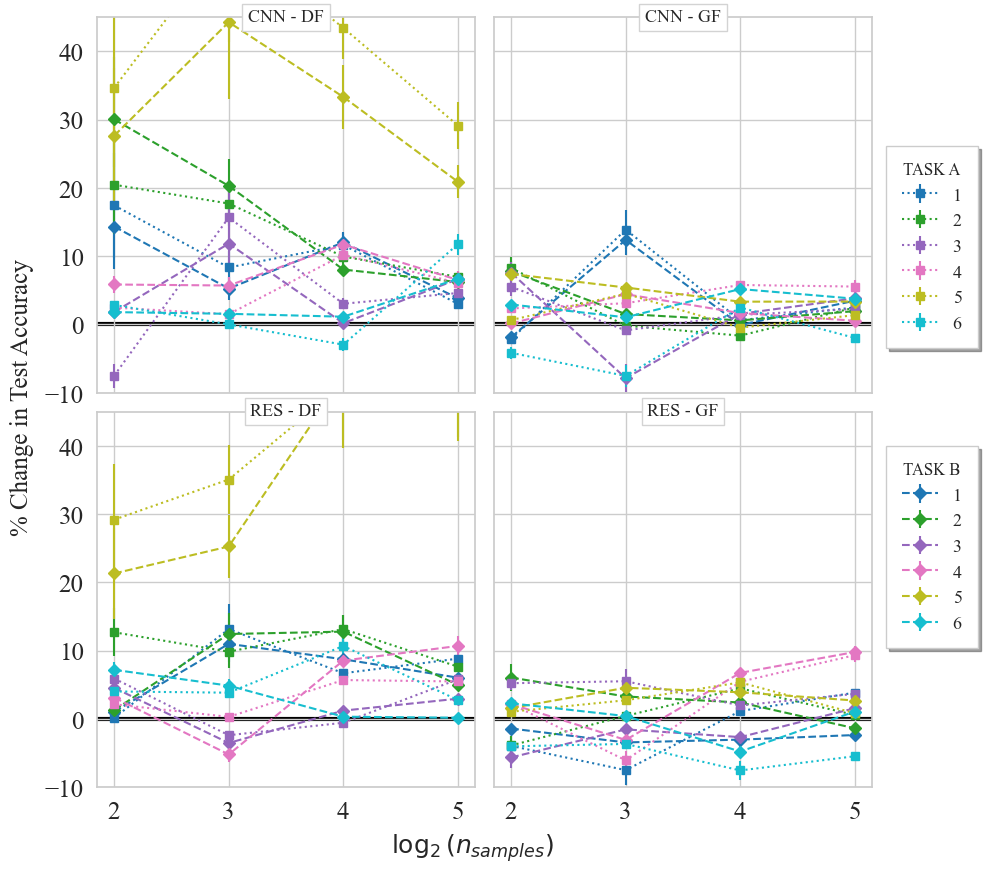

In [160]:
import matplotlib.pyplot as plt
import numpy as np


fontsize: int = 18

plt.rc('font', family='serif', serif='Times New Roman', size=fontsize)
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')


fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), gridspec_kw={"wspace": 0.05, "hspace": 0.05})

cmap = plt.get_cmap("tab10", pdata["dataset"].nunique())
colors =  {dset: cmap(i) for i, dset in enumerate(pdata["dataset"].unique())}
nums =  {dset: i+1 for i, dset in enumerate(pdata["dataset"].unique())}


for (mode, arch, dset), gdf in pdata.groupby(["mode", "arch", "dataset"]):

    color = colors[dset]
    col = 0 if mode == "DF" else 1
    row = 0 if arch == "CNN" else 1

    if mode == "DF":
        label = str(nums[dset]) if arch == "CNN" else None
    else:
        label = str(nums[dset]) if arch == "RES" else None

    iax: plt.Axes = ax[row, col]
    
    # do only once
    if dset == "ArrowHead":
        iax.text(0.5, 1, f"{arch} - {mode}", transform=iax.transAxes, fontsize=fontsize-5,
                 horizontalalignment='center', verticalalignment='center',
                 bbox=dict(edgecolor="lightgray", facecolor='white', alpha=1))
        iax.axhline(color="black", zorder=-10, lw=3)
        if col == 1:
            iax.set_yticklabels([])
        if row == 0:
            iax.set_xticklabels([])
        iax.set_ylim(-10, 45)

    # do the plotting    
    x = np.log2(gdf["train_exc_limit"])
    iax.errorbar(x, gdf["a_mean"]*100, yerr=np.abs(gdf["a_mean"]*100*(gdf["a_std"] + gdf["bline_std"]/gdf["bline_mean"])), 
        linestyle="dotted", marker="s", label=label, c=color)
    iax.errorbar(x, gdf["b_mean"]*100, yerr=np.abs(gdf["b_mean"]*100*(gdf["b_std"] + gdf["bline_std"]/gdf["bline_mean"])),
        linestyle="dashed", marker="D", label=label, c=color)
    
# legends
bpad = 0.9
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles=handles[::2], labels=labels[::2], loc="center", bbox_to_anchor=(0.96,0.65), 
           borderpad=bpad, title="TASK A", ncols=1, fancybox=False, shadow=True, fontsize=fontsize-5)
fig.legend(handles=handles[1::2], labels=labels[1::2], loc="center", bbox_to_anchor=(0.96,0.35), 
           borderpad=bpad, title="TASK B", ncols=1, fancybox=False, shadow=True, fontsize=fontsize-5)

# labels
fig.text(0.5, 0.05, r'$\log_2(n_{samples})$', horizontalalignment='center', verticalalignment='center', 
         transform=fig.transFigure, rotation="horizontal")
fig.text(0.05, 0.5, r"% Change in Test Accuracy", horizontalalignment='center', verticalalignment='center', 
         transform=fig.transFigure, rotation="vertical")

plt.show()


### Results Table

In [2]:
from s3ts.analysis import results_table
results_table(df)

dataset  ArrowHead        CBF      ECG200       GunPoint       \
var           mean  std  mean  std   mean   std     mean  std   
method                                                          
DF-CNN        53.0  3.0  71.0  5.0   57.0   5.0     59.0  6.0   
DF-CNN-A      55.0  2.0  76.0  1.0   60.0   5.0     63.0  7.0   
DF-CNN-B      55.0  1.0  75.0  2.0   61.0   6.0     63.0  5.0   
DF-RES        43.0  1.0  65.0  3.0   57.0   5.0     57.0  4.0   
DF-RES-A      47.0  2.0  70.0  2.0   60.0   1.0     60.0  4.0   
DF-RES-B      46.0  1.0  69.0  4.0   59.0   4.0     63.0  4.0   
GF-CNN        52.0  3.0  63.0  2.0   63.0   6.0     63.0  4.0   
GF-CNN-A      54.0  8.0  64.0  3.0   64.0   7.0     67.0  6.0   
GF-CNN-B      54.0  2.0  64.0  2.0   65.0   6.0     63.0  7.0   
GF-RES        51.0  1.0  63.0  2.0   61.0   6.0     61.0  3.0   
GF-RES-A      53.0  3.0  63.0  3.0   63.0   5.0     66.0  4.0   
GF-RES-B      49.0  2.0  62.0  5.0   62.0   5.0     67.0  2.0   
TS-CNN        39.0  3.0  70.0  2.0   65.0   5.0     58.0  3.0   
TS-NN         33.0  1.0  40.0  1.0   37.0   6.0     51.0  3.0   
TS-RES        42.0  3.0  62.0  2.0   63.0  10.0     60.0  4.0   
TS-RNN        35.0  1.0  55.0  7.0   54.0   6.0     55.0  2.0   

dataset  SyntheticControl      Trace      avg_rank  
var                  mean  std  mean  std           
method                                              
DF-CNN               40.0  4.0  63.0  3.0      7.5  
DF-CNN-A             52.0  1.0  70.0  6.0      4.2  
DF-CNN-B             49.0  1.0  67.0  4.0      3.7  
DF-RES               31.0  4.0  61.0  6.0     11.5  
DF-RES-A             46.0  2.0  63.0  8.0      7.3  
DF-RES-B             47.0  2.0  61.0  5.0      7.5  
GF-CNN               35.0  2.0  56.0  3.0      9.7  
GF-CNN-A             36.0  2.0  55.0  4.0      7.2  
GF-CNN-B             37.0  2.0  58.0  3.0      6.3  
GF-RES               36.0  1.0  57.0  3.0     10.2  
GF-RES-A             37.0  1.0  54.0  1.0      7.8  
GF-RES-B             37.0  1.0  58.0  5.0      8.2  
TS-CNN               64.0  2.0  49.0  3.0      8.2  
TS-NN                27.0  1.0  72.0  2.0     13.5  
TS-RES               37.0  4.0  60.0  3.0      9.8  
TS-RNN               43.0  9.0  53.0  2.0     13.5

### Time Dilation Figure

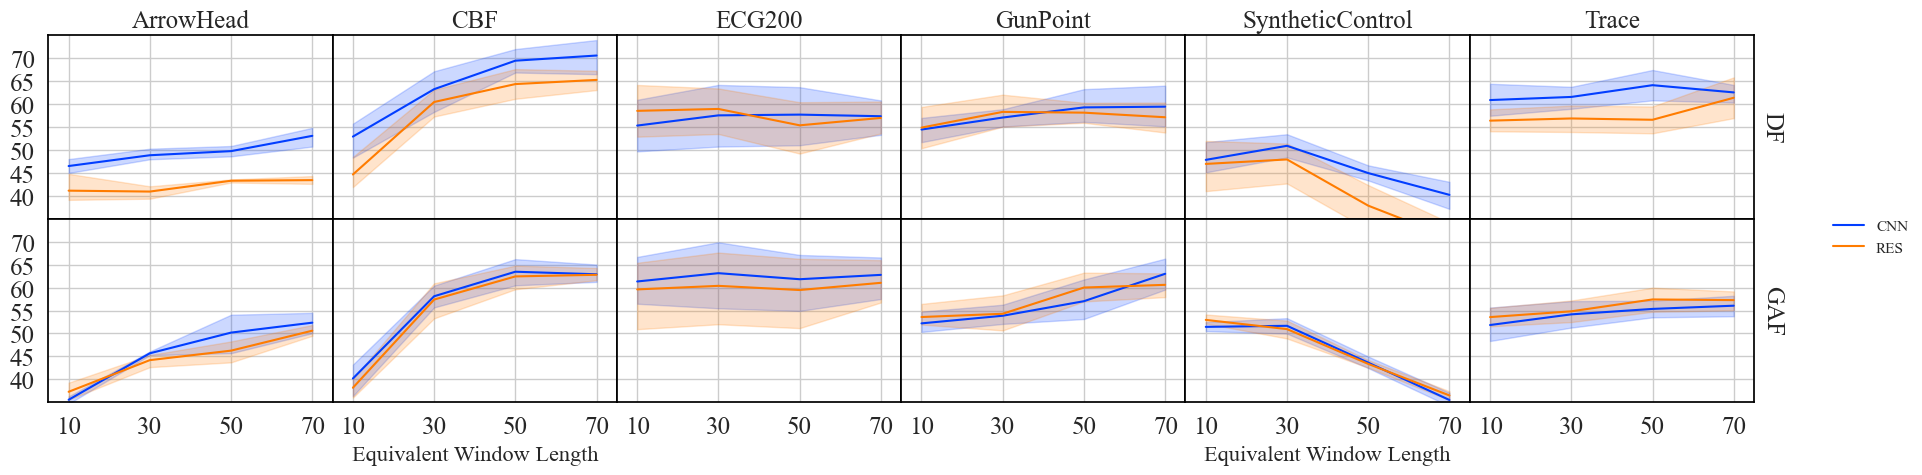

In [3]:
from s3ts.analysis import timedil_figure_horizontal
timedil_figure_horizontal(df)

### Self-Supervised Pretrain Figure

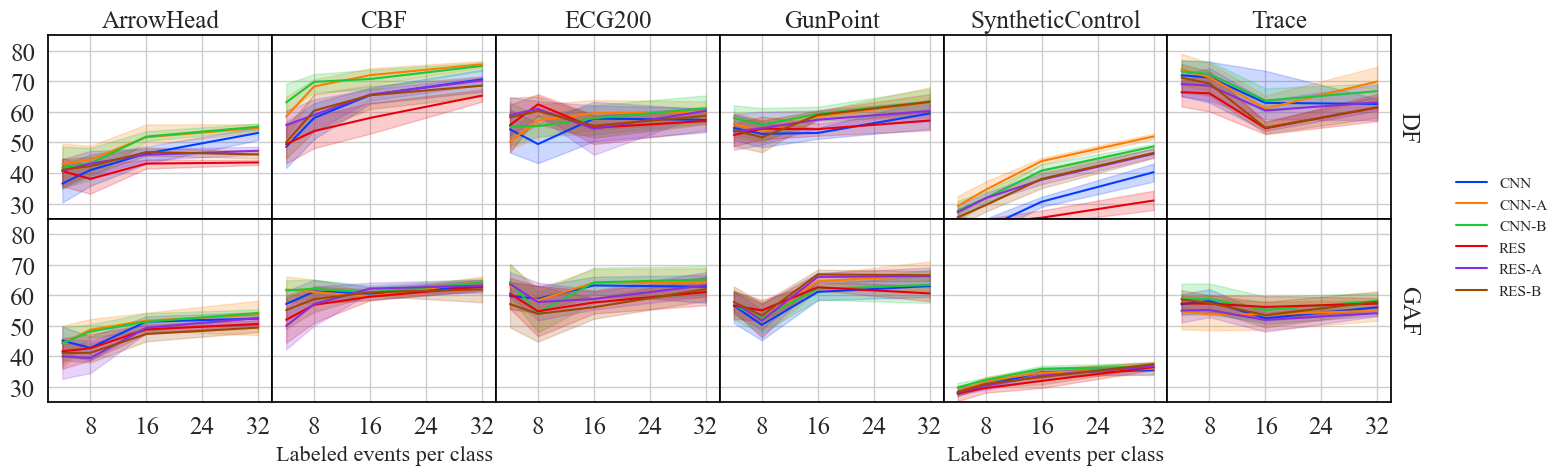

In [75]:
from s3ts.analysis import pretrain_figure_horizontal
pretrain_figure_horizontal(df)

### Dataset Encoding Figures

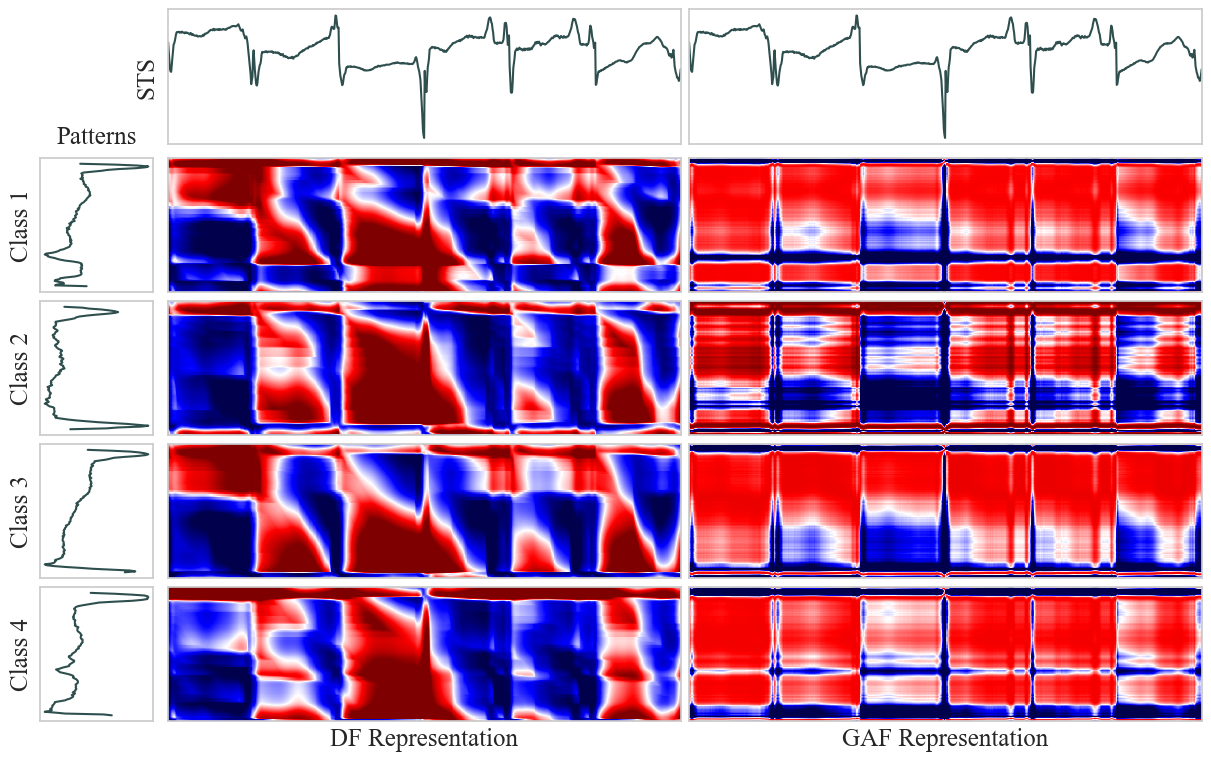

In [5]:
from s3ts.analysis import encoding_plot

#for dset in ["ArrowHead", "CBF", "ECG200", "GunPoint", "SyntheticControl", "Trace"]:
for dset in ["ECG5000"]:    
    encoding_plot(dset)